In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/stroke (2).zip")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**EXPLORAT0RY DATA ANALYSIS**

**1. Numerical attributes**

**HEAT MAP**

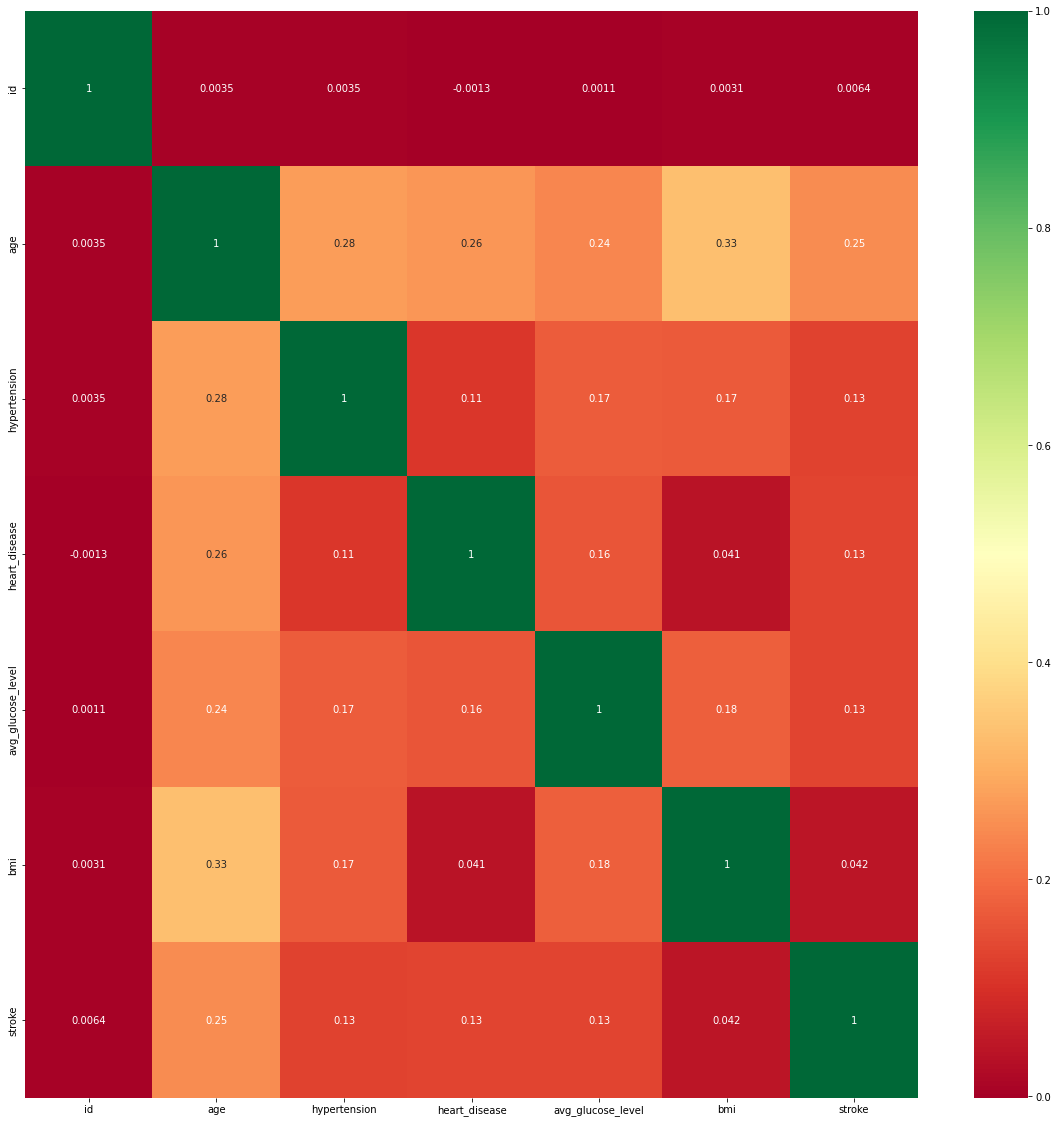

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


**HISTOGRAM**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b65364f50>,
      dtype=object)

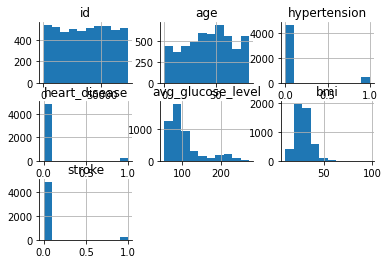

In [ ]:
df.hist()

In [ ]:
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    df_pct = df.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=1,color = ["r","g"]);


In [ ]:
def get_100_percent_stacked_bar_chart(column, width = 0.4):
    # Get the count of records by column and stroke
    df_breakdown = df.groupby([column, 'stroke'])['age'].count()
    # Get the count of records by gender
    df_total = df.groupby([column])['age'].count()
    # Get the percentage for 100% stacked bar chart
    df_pct = df_breakdown / df_total * 100
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=width, color = ['b','g']);


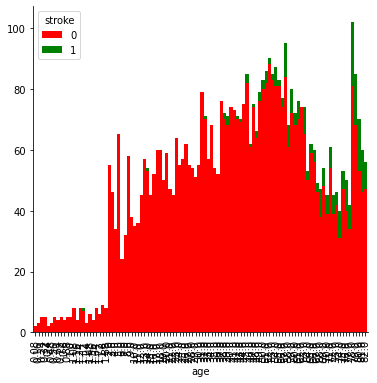

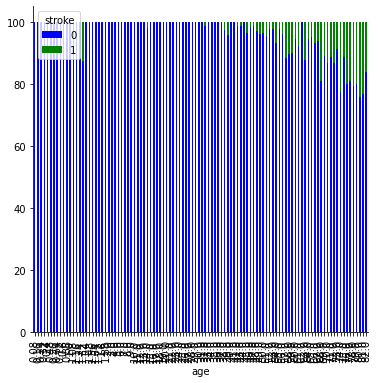

In [ ]:
#AGE
get_stacked_bar_chart('age')
get_100_percent_stacked_bar_chart('age', width = 0.5)

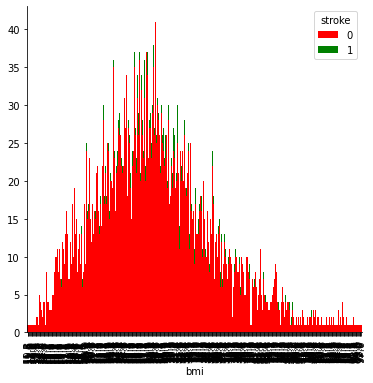

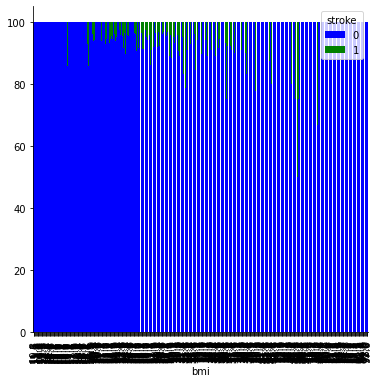

In [ ]:
#BMI
get_stacked_bar_chart('bmi')
get_100_percent_stacked_bar_chart('bmi', width = 0.9)

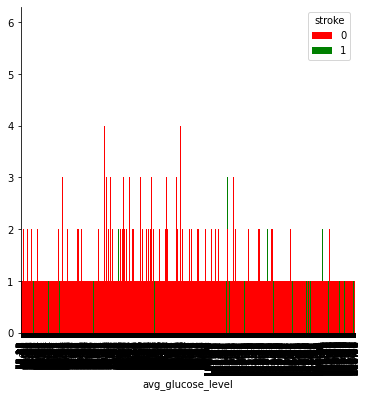

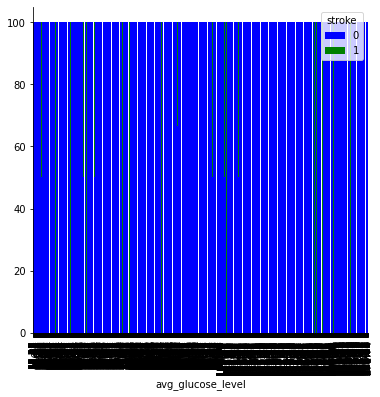

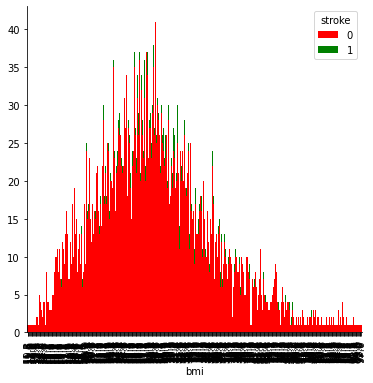

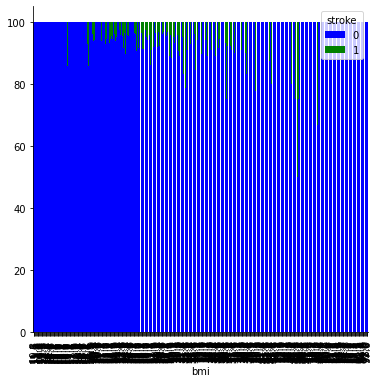

In [ ]:
#AVERAGE GLUCOSE LEVEL
get_stacked_bar_chart('avg_glucose_level')
get_100_percent_stacked_bar_chart('avg_glucose_level', width = 0.9)
get_stacked_bar_chart('bmi')
get_100_percent_stacked_bar_chart('bmi', width = 0.9)


**2. CATEGORICAL ATTRIBUTES**

**a) Hypertension, Heart disease**


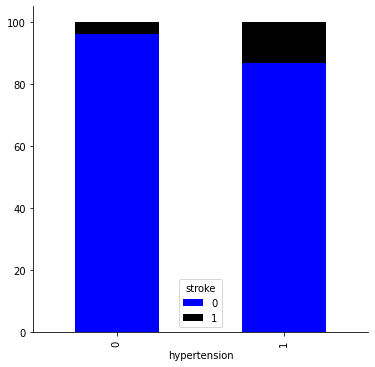

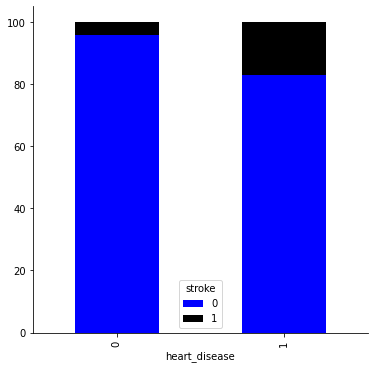

In [ ]:
get_100_percent_stacked_bar_chart('hypertension')
get_100_percent_stacked_bar_chart('heart_disease')


**b) Gender, Residence type**


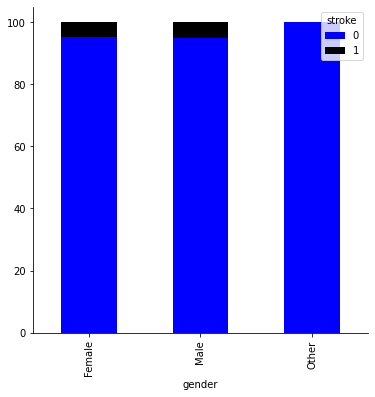

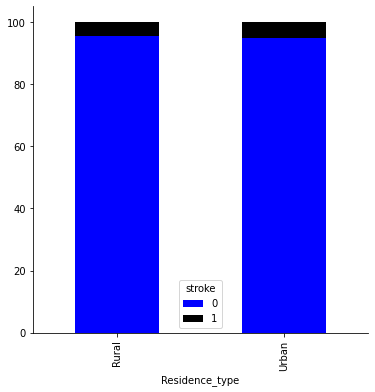

In [ ]:
get_100_percent_stacked_bar_chart('gender')
get_100_percent_stacked_bar_chart('Residence_type')


**3. AGE-RELATED VARIABLES**


**a) Work type**


age           
              count       mean
work_type                     
Govt_job        657  50.879756
Never_worked     22  16.181818
Private        2925  45.503932
Self-employed   819  60.201465
children        687   6.841339

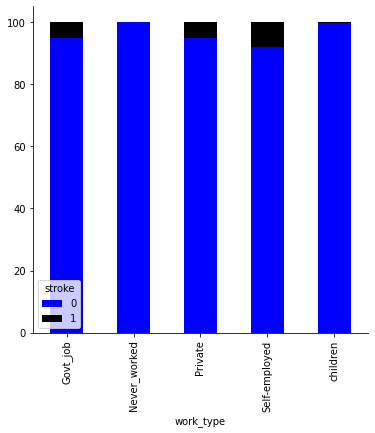

In [ ]:
get_100_percent_stacked_bar_chart('work_type')
df.groupby(['work_type'])[['age']].agg(['count', 'mean'])


**b) Ever married**


age           
             count       mean
ever_married                 
No            1757  22.014229
Yes           3353  54.342082

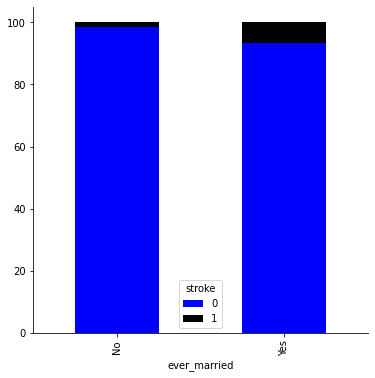

In [ ]:
get_100_percent_stacked_bar_chart('ever_married')
df.groupby(['ever_married'])[['age']].agg(['count', 'mean'])


In [ ]:
df['bmi'].mean()


28.893236911794673

In [ ]:
df['stroke'].value_counts()


0    4861
1     249
Name: stroke, dtype: int64

**DATA PREPROCESSING**

In [ ]:
#BMI ATTRIBUTE
df[df['bmi'].isna() & df['stroke'] == 1]



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


In [ ]:
df['bmi'].fillna(np.round(df['bmi'].mean(), 1), inplace = True)


In [ ]:
#SMOKING_STATUS ATTRIBUTE
df['smoking_status'].fillna('not known', inplace=True)
print(df['smoking_status'].value_counts())


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [ ]:
#GENDER ATTRIBUTE
df = df[df['gender'] != 'Other']


In [ ]:
df['age_norm']=(df['age']-df['age'].min())/(df['age'].max()-df['age'].min())

# Create a new column for normalized avg glucose level
df['avg_glucose_level_norm']=(df['avg_glucose_level']-df['avg_glucose_level'].min())/(df['avg_glucose_level'].max()-df['avg_glucose_level'].min())

# Create a new column for normalized bmi
df['bmi_norm']=(df['bmi']-df['bmi'].min())/(df['bmi'].max()-df['bmi'].min())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
df['age_binned'] = pd.cut(df['age'], np.arange(0, 91, 5))
df['avg_glucose_level_binned'] = pd.cut(df['avg_glucose_level'], np.arange(0, 301, 10))
df['bmi_binned'] = pd.cut(df['bmi'], np.arange(0, 101, 5))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# checking null values
df.isna().sum()

gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                         0
smoking_status              0
stroke                      0
age_norm                    0
avg_glucose_level_norm      0
bmi_norm                    0
age_binned                  0
avg_glucose_level_binned    0
bmi_binned                  0
dtype: int64

In [ ]:
df.groupby(['gender'])['bmi'].agg(['mean', 'median'])

,mean,median
gender,,
Female,29.060387,28.1
Male,28.660331,28.7


In [ ]:
# filling all null values with their gender respective median values

df.bmi[df.gender=='Female'] = df.bmi[df.gender=='Female'].fillna(27.8)
df.bmi[df.gender=='Male'] = df.bmi[df.gender=='Male'].fillna(28.4)
df.bmi[df.gender=='Other'] = df.bmi[df.gender=='Other'].fillna(22.4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [ ]:
df.isna().sum()

gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                         0
smoking_status              0
stroke                      0
age_norm                    0
avg_glucose_level_norm      0
bmi_norm                    0
age_binned                  0
avg_glucose_level_binned    0
bmi_binned                  0
dtype: int64

In [ ]:
# Removing the one instance where gender is 'Other' 

other_index = df[df['gender'] =='Other'].index
df = df.drop(other_index)

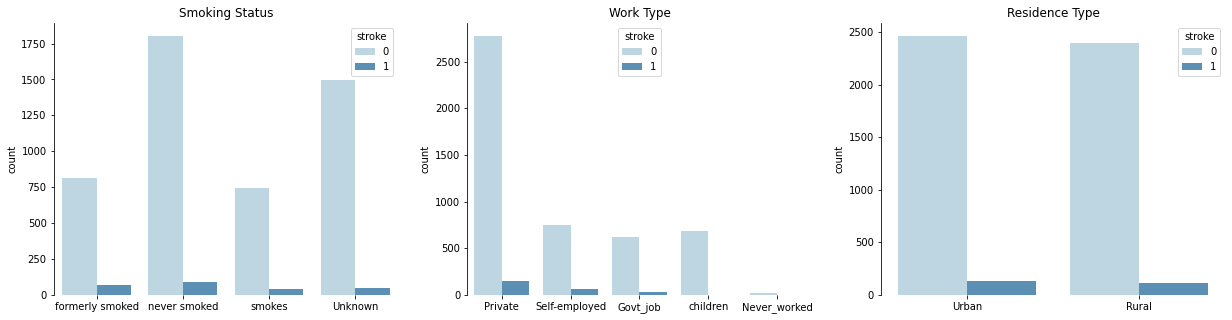

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=df['smoking_status'], alpha=0.8, palette="Paired",hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Smoking Status');

plt.subplot(1,3,2)
sns.countplot(x=df['work_type'], alpha=0.8, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Work Type');

plt.subplot(1,3,3)
sns.countplot(x=df['Residence_type'], alpha=0.8, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Residence Type');

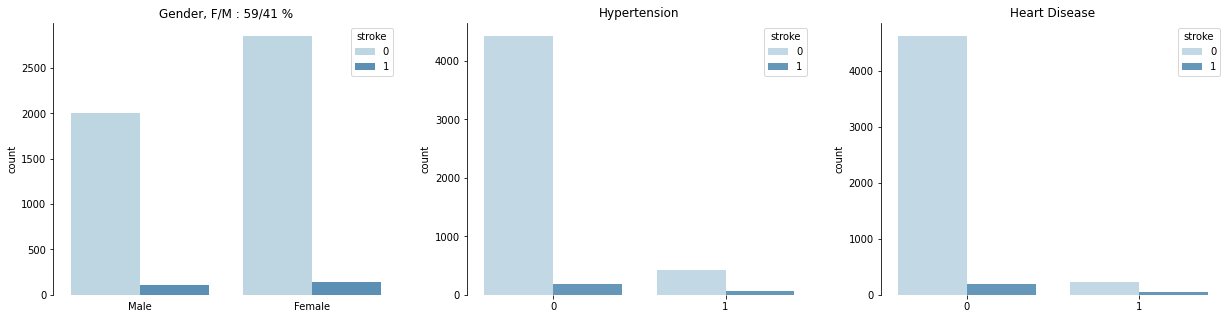

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=df['gender'], alpha=0.8, palette="Paired", hue=df['stroke']);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender, F/M : 59/41 %');

plt.subplot(1,3,2)
sns.countplot(x=df['hypertension'], alpha=0.75, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hypertension');

plt.subplot(1,3,3)
sns.countplot(x=df['heart_disease'], alpha=0.75, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Heart Disease');

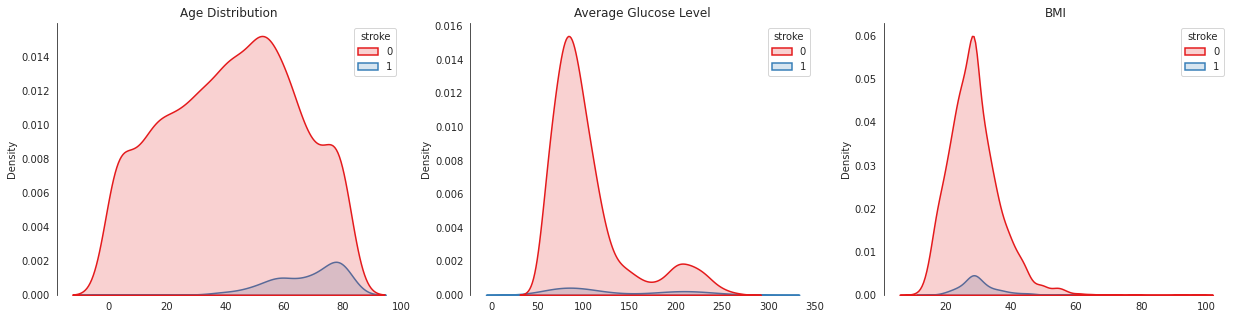

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x=df['age'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age Distribution');

plt.subplot(1,3,2)
sns.kdeplot(x=df['avg_glucose_level'], alpha=0.2, palette="Set1", label='avg_glucose_level',linewidth=1.5, fill=True, hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Average Glucose Level');

plt.subplot(1,3,3)
sns.kdeplot(x=df['bmi'], alpha=0.2, palette="Set1", label='BMI',shade=True, linewidth=1.5, fill=True, hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('BMI');

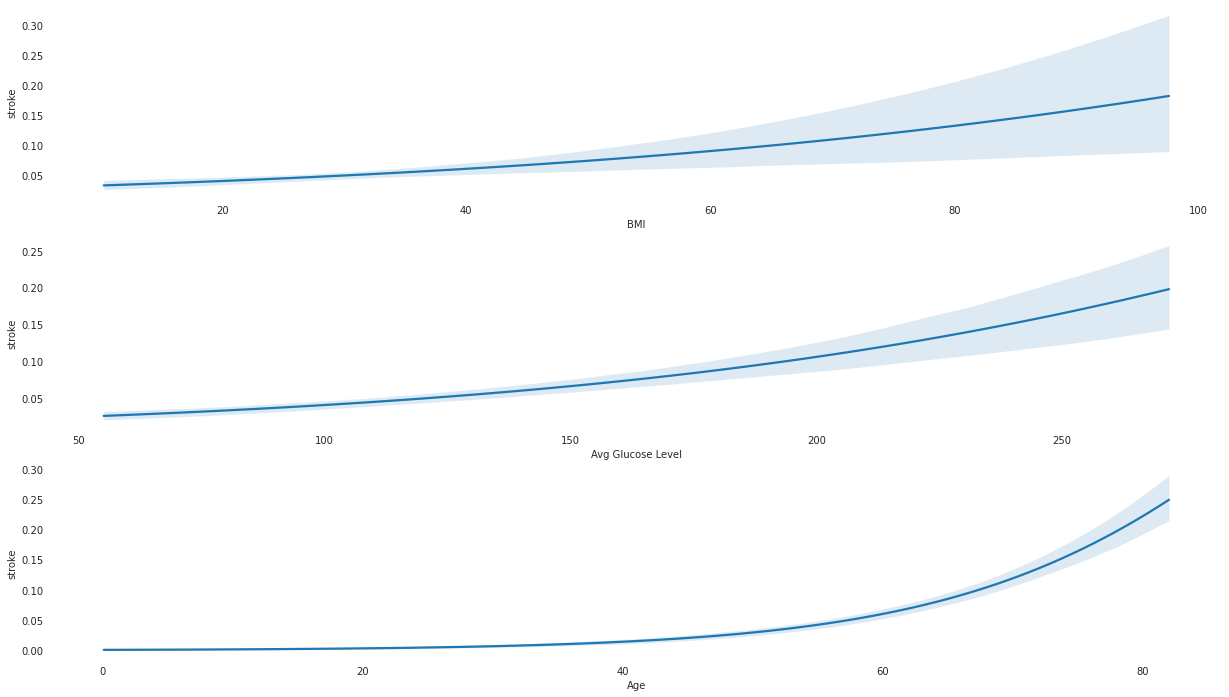

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,12));

plt.subplot(3,1,1)
sns.regplot(x=df['bmi'], y=df['stroke'], scatter=False, logistic=True, label= 'BMI');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('BMI');

plt.subplot(3,1,2)
sns.regplot(x=df['avg_glucose_level'], y=df['stroke'], scatter=False, logistic=True, label='Avg Glucose Level');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Avg Glucose Level');

plt.subplot(3,1,3)
sns.regplot(x=df['age'], y=df['stroke'], scatter=False, logistic=True, label='Age');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Age');

In [ ]:
# checking imbalances in class {1: stroke, 0:no stroke}
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [ ]:
# oversampling data
sm = SMOTE()
X, y = sm.fit_resample(X, y)


In [ ]:
#standardization of data
numerical_cols = X.select_dtypes(["float64","int64"])
scaler = StandardScaler()
X[numerical_cols.columns] = scaler.fit_transform(X[numerical_cols.columns])

In [ ]:
X = df.drop(["id","stroke"], axis=1)
y = df["stroke"]

In [ ]:
y = pd.DataFrame(y, columns=["stroke"])

In [ ]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,-0.328602,4.185032,2.706375,1.005086,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0.786070,-0.328602,-0.238947,2.121559,-0.098981,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,1.626390,-0.328602,4.185032,-0.005028,0.472536,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,0.255342,-0.328602,-0.238947,1.437358,0.719327,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
4,1.582163,3.043196,-0.238947,1.501184,-0.631531,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0


In [ ]:
#onehotencoding
categorical_cols = X.select_dtypes("object")
X = pd.get_dummies(X, columns=categorical_cols.columns)

In [ ]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,-0.328602,4.185032,2.706375,1.005086,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0.786070,-0.328602,-0.238947,2.121559,-0.098981,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,1.626390,-0.328602,4.185032,-0.005028,0.472536,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,0.255342,-0.328602,-0.238947,1.437358,0.719327,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
4,1.582163,3.043196,-0.238947,1.501184,-0.631531,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
score = accuracy_score(predictions, y_test)
print(f"LogisticRegression: {score}")



LogisticRegression: 0.9419439008480104


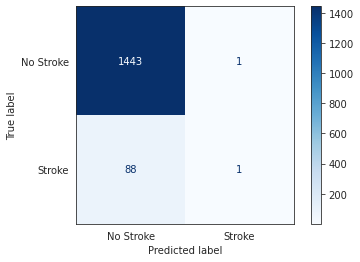

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
log_reg.fit(X_train, y_train)
plot_confusion_matrix(log_reg,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["No Stroke","Stroke"])
plt.show()

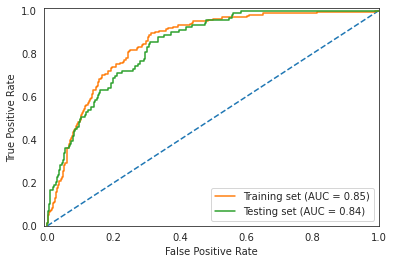

In [ ]:
# Compute the training and testing set ROC curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logregpreds_train = log_reg.predict_proba(X_train).T[1]
fpr1, tpr1, thresh1 = roc_curve(y_train, logregpreds_train)
roc_auc_train= roc_auc_score(y_train, logregpreds_train)

logregpreds_test = log_reg.predict_proba(X_test).T[1]
fpr2, tpr2, thresh2 = roc_curve(y_test, logregpreds_test)
roc_auc_test= roc_auc_score(y_test, logregpreds_test)

# Plot the ROC curves
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, label='Training set (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr2, tpr2, label='Testing set (AUC = %0.2f)' % roc_auc_test)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

In [ ]:
randomforest = RandomForestClassifier(n_estimators=1000, random_state=42)
randomforest.fit(X_train, y_train)
predictions = randomforest.predict(X_test)
score = accuracy_score(predictions, y_test)
print(f"RandomForestClassifier: {score}")

RandomForestClassifier: 0.9419439008480104


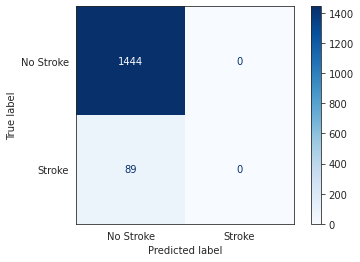

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
randomforest.fit(X_train, y_train)
plot_confusion_matrix(randomforest,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["No Stroke","Stroke"])
plt.show()

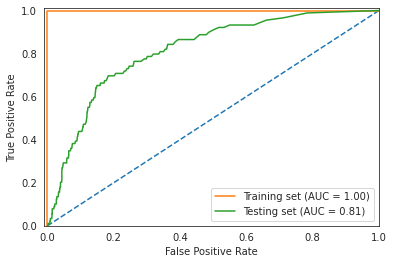

In [ ]:
# Compute the training and testing set ROC curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
randomforestpreds_train = randomforest.predict_proba(X_train).T[1]
fpr1, tpr1, thresh1 = roc_curve(y_train, randomforestpreds_train)
roc_auc_train= roc_auc_score(y_train, randomforestpreds_train)

randomforestpreds_test = randomforest.predict_proba(X_test).T[1]
fpr2, tpr2, thresh2 = roc_curve(y_test, randomforestpreds_test)
roc_auc_test= roc_auc_score(y_test, randomforestpreds_test)

# Plot the ROC curves
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, label='Training set (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr2, tpr2, label='Testing set (AUC = %0.2f)' % roc_auc_test)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predictions = BNB.predict(X_test)
score = accuracy_score(predictions, y_test)
print(f"BernoulliNB: {score}")

BernoulliNB: 0.9243313763861709


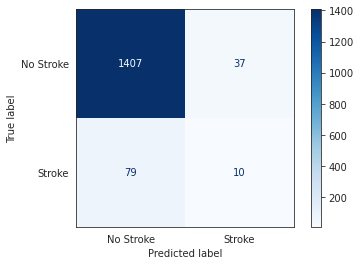

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
BNB.fit(X_train, y_train)
plot_confusion_matrix(BNB,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["No Stroke","Stroke"])
plt.show()

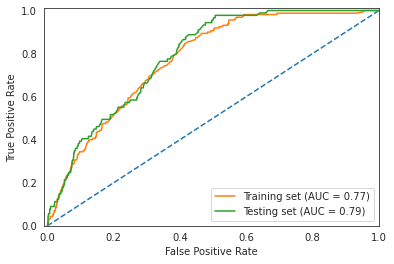

In [ ]:
# Compute the training and testing set ROC curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
BNBpreds_train = BNB.predict_proba(X_train).T[1]
fpr1, tpr1, thresh1 = roc_curve(y_train, BNBpreds_train)
roc_auc_train= roc_auc_score(y_train, BNBpreds_train)

BNBpreds_test = BNB.predict_proba(X_test).T[1]
fpr2, tpr2, thresh2 = roc_curve(y_test, BNBpreds_test)
roc_auc_test= roc_auc_score(y_test, BNBpreds_test)

# Plot the ROC curves
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr1, tpr1, label='Training set (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr2, tpr2, label='Testing set (AUC = %0.2f)' % roc_auc_test)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');
plt.show()